In [199]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [211]:
df = pd.read_csv('./train.csv')

# EDA

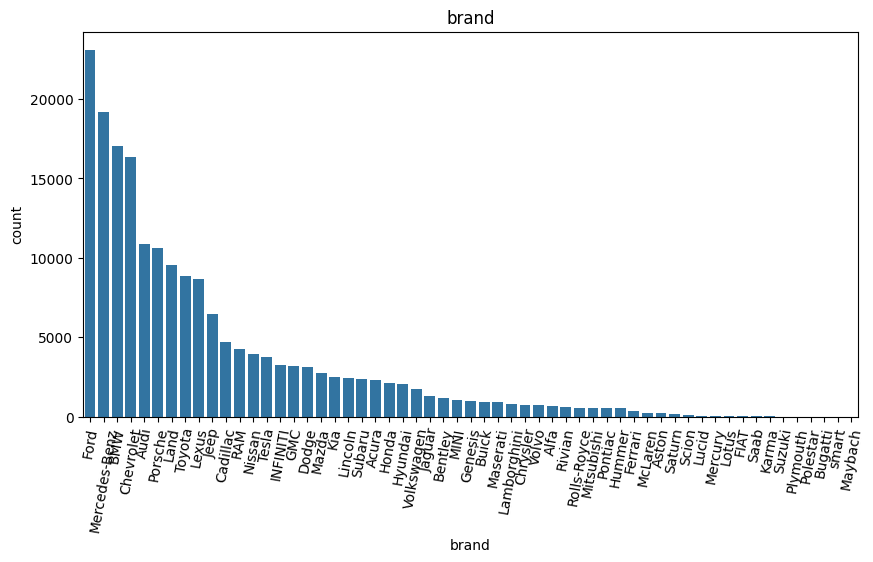

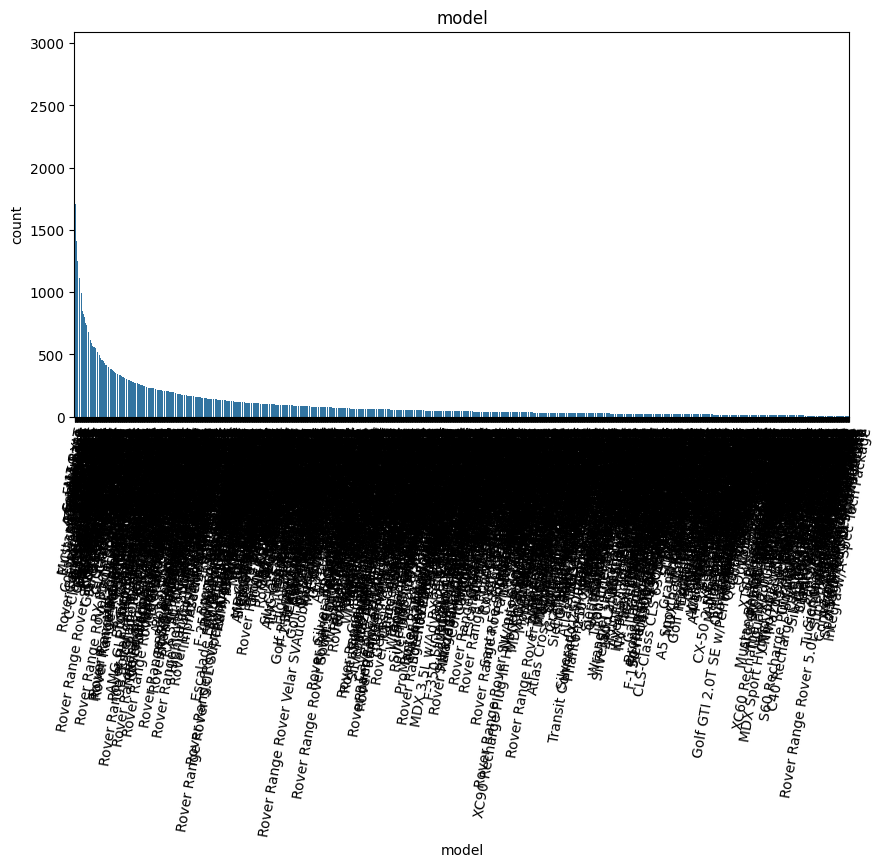

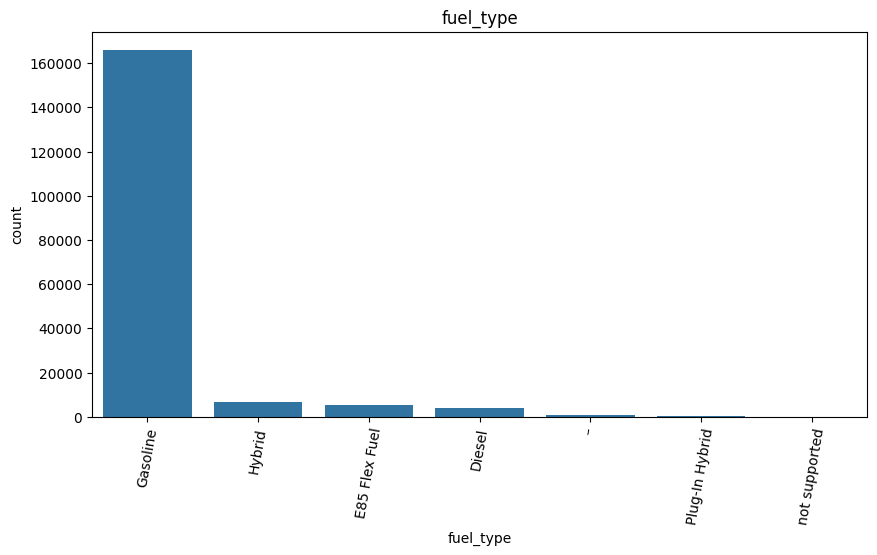

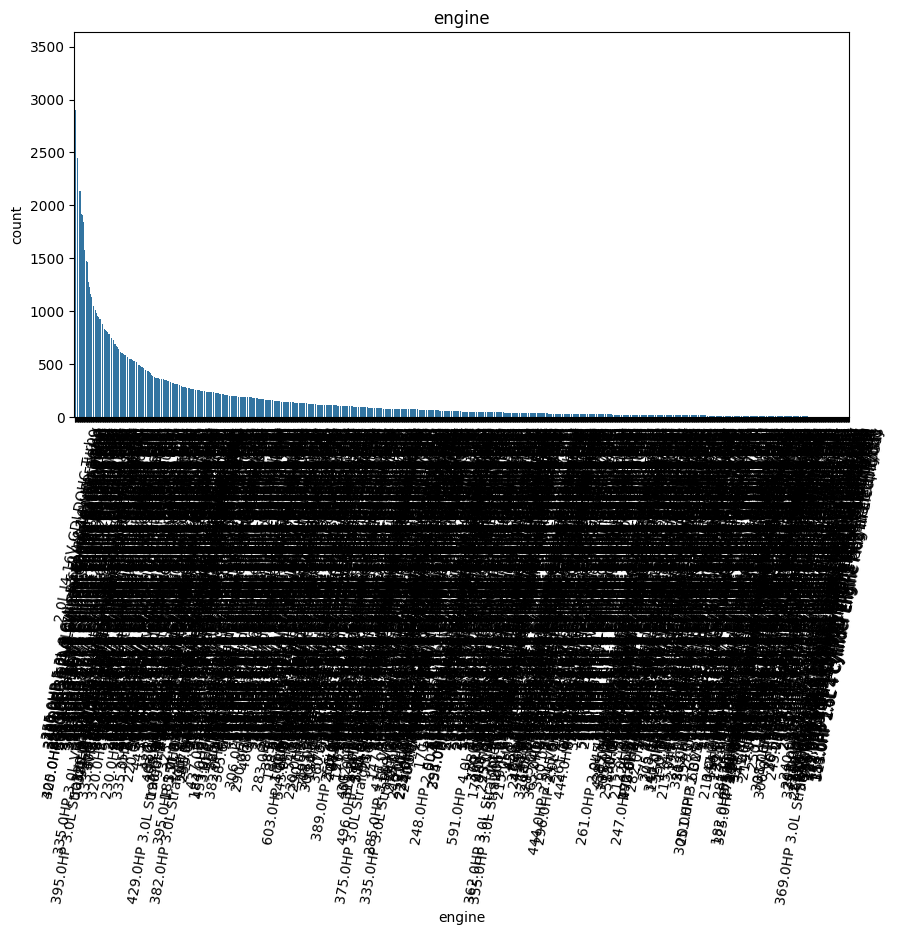

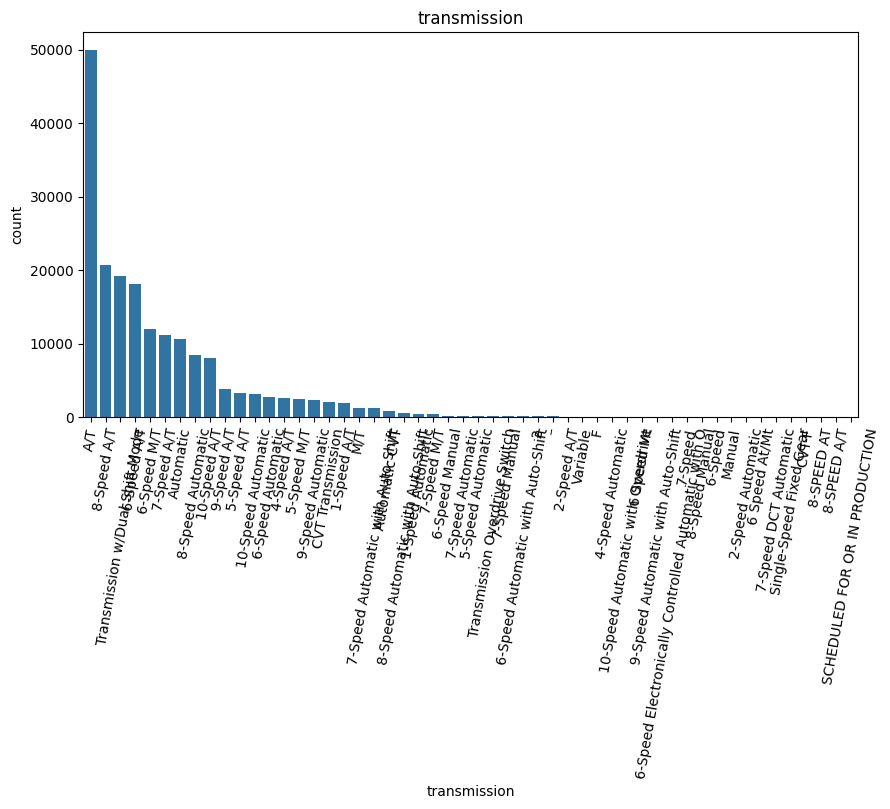

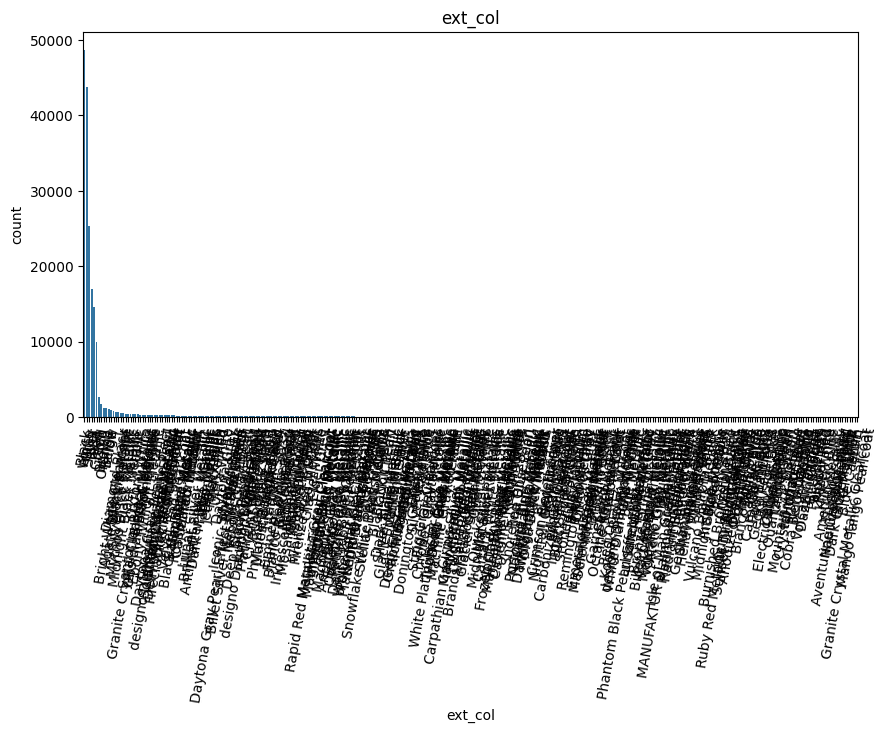

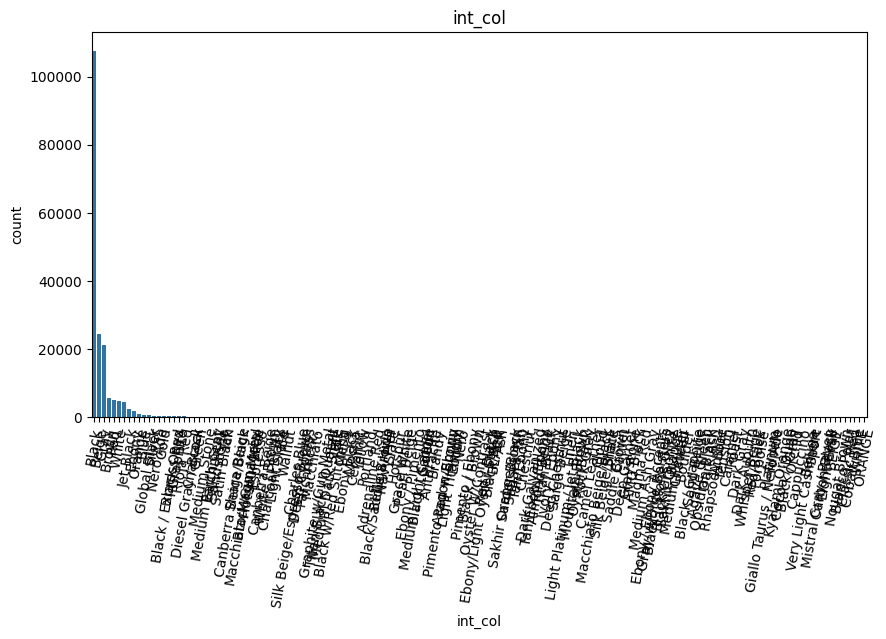

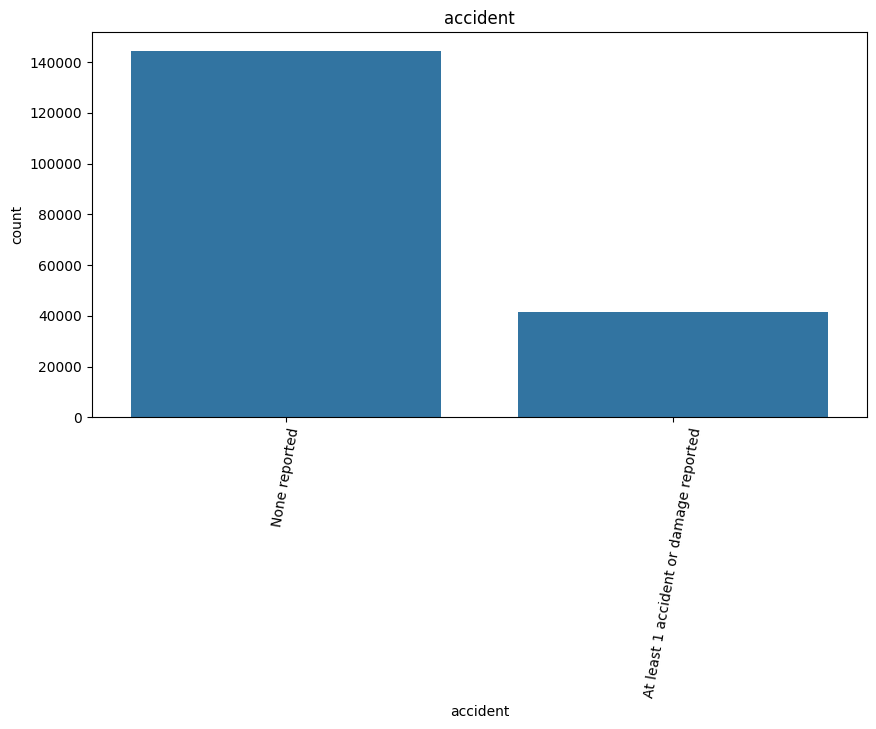

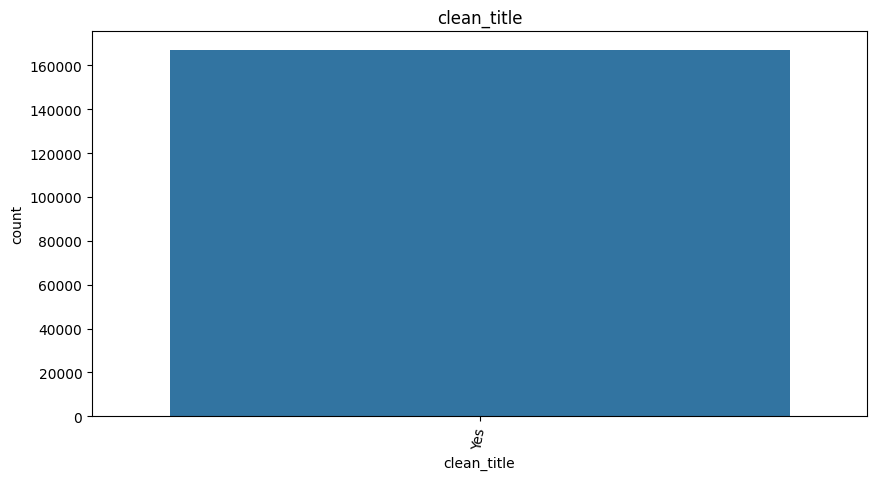

In [201]:
cat_columns = df.select_dtypes(include=['object','category']).columns

for col in cat_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=80)
    plt.show

In [167]:
df.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [168]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


# Cleaning & Transforming Data

In [212]:
df['accident'] = np.where(df['accident']=='None reported', 0, 1)

In [213]:
# ext_col and int_col
df['int_col'] = df['int_col'].str.replace('/',' ').str.lower().str.split(' ')
df['ext_col'] = df['ext_col'].str.replace('/',' ').str.lower().str.split(' ')

simple_colors = ['black','beige','gray','brown','red','white']
external_color = []
internal_color = []

for sub_list in df['ext_col']:
    found = False
    for color in simple_colors:
        if color in sub_list:
            external_color.append(color)
            found = True
            break
    if not found:
        external_color.append("others")

for sub_list in df['int_col']:
    found = False
    for color in simple_colors:
        if color in sub_list:
            internal_color.append(color)
            found = True
            break
    if not found:
        internal_color.append("others")

df['ext_col'] = external_color
df['int_col'] = internal_color

In [214]:
df_aux = pd.DataFrame({
    "model": df['model'].value_counts().index.tolist(),
    "qtde": df['model'].value_counts().values.tolist()
})

df_aux.head(50)

,model,qtde
0,F-150 XLT,2945
1,M3 Base,2229
2,Camaro 2SS,1709
3,M4 Base,1622
4,Mustang GT Premium,1526
5,F-150 Lariat,1410
6,E-Class E 350 4MATIC,1357
7,1500 Laramie,1249
8,911 Carrera S,1219
9,Corvette Base,1184


In [215]:
aux_count = df['brand'].value_counts()
df['brand'] = [brand_name if aux_count[brand_name] >= 1000 else "other" for brand_name in df['brand']]

In [216]:
df['transmission'] = df['transmission'].str.replace('-',' ').str.replace('w/',' ').str.split(' ')

transmission_types = ['M/T','A/T']
transmission_speed = ['1','2','3','4','5','6','7','8','9','10']
transmission_shift = ['Dual', 'Auto-Shift']

aux_type = []
aux_speed = []
aux_shift = []

for i in df['transmission']:
    found = False
    for type in transmission_types:
        if type in i:
            aux_type.append(type)
            found = True
            break
    if not found:
        aux_type.append("A/T")
    found = False
    for speed in transmission_speed:
        if speed in i:
            aux_speed.append(speed)
            found = True
            break
    if not found:
        aux_speed.append("M/T")
    found = False
    for shift in transmission_shift:
        if shift in i:
            aux_shift.append(shift)
            found = True
            break
    if not found:
        aux_shift.append("M/T")

df['transmission_type'] = aux_type
df['transmission_speed'] = aux_speed
df['transmission_shift'] = aux_shift

In [217]:
df['fuel_type'] = df['fuel_type'].fillna("outros")
df['fuel_type'] = df['fuel_type'].str.replace('-',' ').str.split(' ')

fuel_types = ['Gasoline','Flex','Hybrid','Diesel']

aux_fuel = []

for i in df['fuel_type']:
    found = False
    for fuel in fuel_types:
        if fuel in i:
            aux_fuel.append(fuel)
            found = True
            break
    if not found:
        aux_fuel.append("A/T")

df['fuel_type'] = aux_fuel

In [218]:
df['aux_column'] = df['engine'].fillna("outros")
df['aux_column'] = df['aux_column'].str.replace('-',' ').str.split(' ')

volume_aux = []
horsepower_aux = []

for i in df['aux_column']:
    found = False
    for j in i:
        if j.endswith('L'):
            volume_aux.append(j)
            found = True
            break
    if not found:
        volume_aux.append("others")

for i in df['aux_column']:
    found = False
    for j in i:
        if j.endswith('HP'):
            horsepower_aux.append(j)
            found = True
            break
    if not found:
        horsepower_aux.append("others")


df['engine_volume'] = volume_aux
df['engine_hp'] = horsepower_aux

# Prediction w/o Feature Engineering

In [236]:
# Instalar virtualenv, se necessário
! pip install virtualenv

# Criar um novo ambiente virtual
virtualenv myenv

# Ativar o ambiente (no Windows)
myenv\Scripts\activate

# Ativar o ambiente (no Linux/macOS)
source myenv/bin/activate

# Instalar CatBoost e NumPy no ambiente virtual
pip install catboost numpy

SyntaxError: invalid syntax (1040606085.py, line 5)

In [233]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [219]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,transmission_type,transmission_speed,transmission_shift,aux_column,engine_volume,engine_hp
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,[A/T],others,gray,0,Yes,4200,A/T,M/T,M/T,"[172.0HP, 1.6L, 4, Cylinder, Engine, Gasoline,...",1.6L,172.0HP
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,[A/T],others,beige,1,Yes,4999,A/T,M/T,M/T,"[252.0HP, 3.9L, 8, Cylinder, Engine, Gasoline,...",3.9L,252.0HP
2,2,Chevrolet,Silverado 2500 LT,2002,136731,Flex,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,[A/T],others,gray,0,Yes,13900,A/T,M/T,M/T,"[320.0HP, 5.3L, 8, Cylinder, Engine, Flex, Fue...",5.3L,320.0HP
3,3,other,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,"[Transmission, , Dual, Shift, Mode]",black,black,0,Yes,45000,A/T,M/T,Dual,"[420.0HP, 5.0L, 8, Cylinder, Engine, Gasoline,...",5.0L,420.0HP
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,"[7, Speed, A/T]",black,beige,0,Yes,97500,A/T,7,M/T,"[208.0HP, 2.0L, 4, Cylinder, Engine, Gasoline,...",2.0L,208.0HP


In [221]:

vars = ['brand','model','mileage','model_year','fuel_type','accident','clean_title','transmission_type','transmission_speed','transmission_shift','engine_volume','engine_hp','transmission_shift']
X_train, X_test, y_train, y_test = train_test_split(df[vars], df['price'], test_size=0.00000001, random_state=42)

In [224]:
# Identificando quais colunas são categóricas (aqui a coluna 'cidade')
categorical_features = ['brand','model','mileage','model_year','fuel_type','accident','clean_title','transmission_type','transmission_speed','transmission_shift','engine_volume','engine_hp','transmission_shift']

# Criando e treinando o modelo de CatBoost
model = CatBoostRegressor(cat_features=categorical_features, verbose=0)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Ford'